Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Отлично, что риск убытков посчитан верно.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

<div class="alert alert-block alert-warning">

<b>Комментарий студента: </b> Спасибо за качественное ревью проекта, рада, что старания оценены. Исправила все критические ошибки, а так же исправила моменты по твоим советам. Интересный факт про наименование константных переменных, буду пользоваться, так действительно понятнее в коде, что эти переменные определены :)
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах!

In [2]:
#%pip install -q -r requirements-ml.txt

In [3]:
%pip install scikit-learn==0.22.1

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.0 MB 1.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Выбор локации для скважины

## Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть».

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. 

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

### Условия задачи:

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

### Цель исследования:
Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.Таким образом, выбрать лучшую локацию длу бурения скважины.

### Ход исследования:
1. Загрузка и подготовка исходных данных
2. Обучение и проверка модели для каждого региона
3. Подготовка к расчёту прибыли
4. Расчёт прибыли по выбранным скважинам и предсказаниям модели
5. Расчёт рисков
6. Общий вывод


## Загрузка и подготовка данных

Импортирую все необходимые библиотеки и модули, необходимые для реализации проекта.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from scipy import stats as st

pd.options.mode.chained_assignment = None

In [5]:
import warnings
warnings.filterwarnings("ignore") 

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в верхней части ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

Дано три исходных файла с данными. Импортирую их методом read_csv библиотеки pandas, оформлю в датафрейм.

In [6]:
try:
    data0 = pd.read_csv('geo_data_0.csv')
except FileNotFoundError as e:
    print(e)
    data0 = pd.read_csv('/datasets/geo_data_0.csv')
    
data0.name = 'geo_data_0'

[Errno 2] File b'geo_data_0.csv' does not exist: b'geo_data_0.csv'


In [7]:
try:
    data1 = pd.read_csv('geo_data_1.csv')
except FileNotFoundError as e:
    print(e)
    data1 = pd.read_csv('/datasets/geo_data_1.csv')

data1.name = 'geo_data_1'

[Errno 2] File b'geo_data_1.csv' does not exist: b'geo_data_1.csv'


In [8]:
try:
    data2 = pd.read_csv('geo_data_2.csv')
except FileNotFoundError as e:
    print(e)
    data2 = pd.read_csv('/datasets/geo_data_2.csv')
    
data2.name = 'geo_data_2'

[Errno 2] File b'geo_data_2.csv' does not exist: b'geo_data_2.csv'


In [9]:
data_total = [data0, data1, data2]

In [10]:
for data in data_total:
    print('Набор данных', data.name)
    print(data.head())
    print()
    data.info()
    print()
    print()

Набор данных geo_data_0
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Набор данных geo_data_1
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  1

В каждом датасете находится информация по конкретному региону. Все значения в столбцах заполнены значениями.

В датафрейме 5 столбцов:
- **id** — уникальный идентификатор скважины;
- **f0, f1, f2** — три признака точек (неважно, что они означают, но сами признаки значимы);
- **product** — объём запасов в скважине (тыс. баррелей).


В датафреймах id, f0, f1, f2 - признаки, product - целевой признак, который будет предсказывать обученнная модель в дальнейших шагах проекта.

In [11]:
for data in data_total:
    print('Количество уникальных id для', data.name, data['id'].nunique())

Количество уникальных id для geo_data_0 99990
Количество уникальных id для geo_data_1 99996
Количество уникальных id для geo_data_2 99996


Для предсказания целевого признака product - id скважины в наборе данных бесполезен, так как почти все id в датасетах уникальны и не могут дать никакой информации для предсказания,  поэтому этот столбец можно удалить в каждом датафрейме.

In [12]:
data0 = data0.drop('id', axis=1)
data1 = data1.drop('id', axis=1)
data2 = data2.drop('id', axis=1)

Методом describe() выведу основные статистические показатели для каждого набора данных.

In [13]:
for data in data_total:
    print('Статистические показатели для датасета', data.name)
    print(data.describe())

Статистические показатели для датасета geo_data_0
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
Статистические показатели для датасета geo_data_1
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -

В каждом датасете показатели среднего и медианного значения для каждого из признака приблизительно равны, что означает, что сущетсвенного количества выбросов (экстремальных значений) в данных нет.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен. Согласен, что колонку id можно удалить.
</div>

Для того, чтобы исследовать данные на мультиколлинеарность, выведу матрицу корреляции импортированным методом scatter_matrix() между всеми столбцами, кроме "product", так как этот столбец с целевым признаком. Мультиколлинеарность — корреляция независимых переменных, которая затрудняет оценку и анализ общего результата. В машинном обучении мультиколлинеарность может стать причиной переобучаемости модели, что приведет к неверному результату.

Scatter Matrix для geo_data_0
Scatter Matrix для geo_data_1
Scatter Matrix для geo_data_2


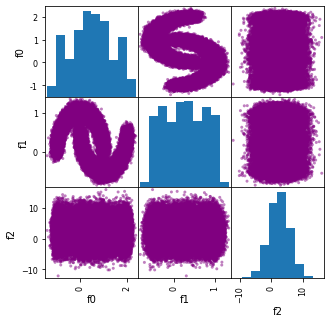

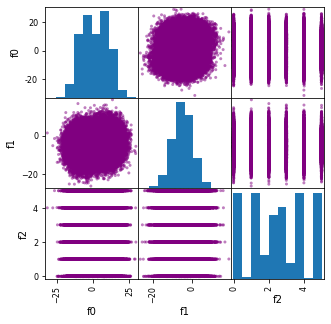

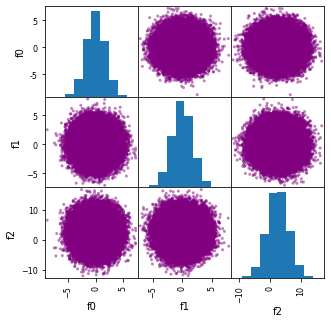

In [14]:
for data in data_total:
    print('Scatter Matrix для', data.name)
    scatter_matrix(data.drop(['product'],axis =1), figsize=(5, 5), color = 'purple')

По графикам можно заметить, что ни в одном датасете не выявлена сильная зависимость между признаками, значит мультиколлинеарность отсутствует и можно оставить все признаки в данных для обучения модели в дальнейших шагах.

**Вывод:** Исходные данные не нуждаются в детальной обработке, так как пропусков в значениях нет, значительных выбросов тоже нет. Мультиколлинеарность признаков отсутствует, поэтому все признаки оставлены в датасетах. Исключен признак "id", так как почти в каждой строке он уникален и никак не улучшит обучение модели. Замечено, что значения в признаках f1,f0,f2 разного масштаба, поэтому в следующем шаге необходимо будет их стандартизировать.

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что распределения были визуализированы.
</div>

## Обучение и проверка модели

Разделю данные каждого датасета на две выборки - обучаемую, валидационную в отношении 75:25. Так как имеется три датасета, я напишу функцию для упрощения и оптимизации разбивок. Так же в функцию помещу масштабирование переменных f0,f1,f2.

In [15]:
def split_scale (data):
    features = data.drop('product', axis=1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

    numeric = ['f0', 'f1', 'f2']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])

    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    return features_train, features_valid, target_train, target_valid   

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что scaler был обучен только на тренировочной части данных!
</div>

In [16]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = split_scale(data0)
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_scale(data1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_scale(data2)

Методом shape проверю, что разделение прошло успешно на одном из датасетов на одной из выборок.

In [17]:
print(features_train_0.shape)
target_train_0.shape

(75000, 3)


(75000,)

Так как в целевом признаке содержатся количественные переменная, для обучения подойдет модель линейной регрессии. Создам функцию для обучения выборок из датасетов, а так же выведении метрики RMSE (квадратный корень из средней квадратичной ошибки)и среднего показателя предсказанного целевого признака, чтобы сравнить это значение далее с истинным средним значением целевого признака валидационной выборки для проверки корректности обучения и качества модели обучения.

In [18]:
def model(features_train, features_valid, target_train, target_valid):
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = pd.Series(model.predict(features_valid))

    rmse = mean_squared_error(target_valid, predictions_valid)**0.5
    mean_pred_pr = predictions_valid.mean()
    
    return predictions_valid, rmse, mean_pred_pr

In [19]:
predictions_valid_0, rmse_0, mean_pred_pr_0 = model(features_train_0, features_valid_0, target_train_0, target_valid_0)
predictions_valid_1, rmse_1, mean_pred_pr_1 = model(features_train_1, features_valid_1, target_train_1, target_valid_1)
predictions_valid_2, rmse_2, mean_pred_pr_2 = model(features_train_2, features_valid_2, target_train_2, target_valid_2)

In [20]:
print(f'Регион 1: среднее значение предсказанного признака: {mean_pred_pr_0:.2f}; RMSE: {rmse_0:.2f}')
print(f'Регион 2: среднее значение предсказанного признака: {mean_pred_pr_1:.2f}; RMSE: {rmse_1:.2f}')
print(f'Регион 3: среднее значение предсказанного признака: {mean_pred_pr_2:.2f}; RMSE: {rmse_2:.2f}')

Регион 1: среднее значение предсказанного признака: 92.59; RMSE: 37.58
Регион 2: среднее значение предсказанного признака: 68.73; RMSE: 0.89
Регион 3: среднее значение предсказанного признака: 94.97; RMSE: 40.03


In [21]:
print(f'Регион 1: среднее значение предсказанного признака: {mean_pred_pr_0:.2f}; реальное среднее значение целевого признака: {target_valid_0.mean():.2f}')
print(f'Регион 2: среднее значение предсказанного признака: {mean_pred_pr_1:.2f}; реальное среднее значение целевого признака: {target_valid_1.mean():.2f}')
print(f'Регион 3: среднее значение предсказанного признака: {mean_pred_pr_2:.2f}; реальное среднее значение целевого признака: {target_valid_2.mean():.2f}')

Регион 1: среднее значение предсказанного признака: 92.59; реальное среднее значение целевого признака: 92.08
Регион 2: среднее значение предсказанного признака: 68.73; реальное среднее значение целевого признака: 68.72
Регион 3: среднее значение предсказанного признака: 94.97; реальное среднее значение целевого признака: 94.88


**Вывод:** Сравнив значения реального среднего значения целевого признака валидационной выборки с средним предсказанным значением, можно сделать вывод, что модель обучилась хорошо. В каждом из регионов ссреднее предсказанных значений от реального среднего отличается на несколько сотых. Метрика RMSE ниже всего у второго региона, что означает что квадратный корень из средней квадратичной ошибки результатов обученной модели меньше единицы и предсказанные данные почти точь в точь совпадают с данными реальными. 

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно. Радует, что ты активно используешь функции. Это помогает избежать дублирования кода, а значит уменьшает вероятность совершить ошибку/опечатку!
</div>

## Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Сохраню все ключевые значения для расчётов в отдельных переменных.

In [22]:
EXPLORED = 500
BEST = 200
BUDGET = 10000000000
REVENUE_PER_BARREL = 450
REVENUE_PER_PRODUCT = 450000
RISK = 2.5
SAMPLES = 1000

<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

<div class="alert alert-block alert-warning">

<b>Изменения: </b> В названиях константных переменных использовала большие буквы.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Спасибо!
</div>

In [24]:
breakevenpoint = BUDGET/REVENUE_PER_PRODUCT/200
print(f'Объём сырья для безубыточной разработки новой скважины: {breakevenpoint:.0f} тыс. баррелей')

Объём сырья для безубыточной разработки новой скважины: 111 тыс. баррелей


In [25]:
for data in data_total:
    product_mean = data['product'].mean()
    print(f'Среднее значение product {data.name}: {product_mean:.2f}')
    print(f'Разница безубыточного объема сырья для разработки и среднего значения: {breakevenpoint-product_mean:.2f}')

Среднее значение product geo_data_0: 92.50
Разница безубыточного объема сырья для разработки и среднего значения: 18.61
Среднее значение product geo_data_1: 68.83
Разница безубыточного объема сырья для разработки и среднего значения: 42.29
Среднее значение product geo_data_2: 95.00
Разница безубыточного объема сырья для разработки и среднего значения: 16.11


Разница безубыточного объема сырья для разработки и среднего значения в каждом из регионов больше нуля, что означает, что данный проект можно сделать прибыльным, выбрав лучшие для разработки скважины.

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

## Расчёт прибыли и рисков 

Для расчета прибыли, необходимо выделить 200 скважин с максимальными значениями предсказаний, просуммировать целевое значение объёма сырья, соответствующее этим предсказаниям и рассчитать прибыль для полученного объема сырья. Для подсчета создам функцию, которая принимает на вход значения предсказаний, значения целевого признака, и выводит рассчитанную прибыль на выходе.

In [26]:
def revenue (target_valid, predictions_valid, best):
    
    top200 = predictions_valid.sort_values(ascending=False)
    target_values = target_valid.reset_index(drop=True)[top200.index][:best] 
    revenue = target_values.sum()*REVENUE_PER_PRODUCT
    
    return revenue

In [28]:
income_0 = revenue(target_valid_0, predictions_valid_0, BEST)-BUDGET
income_1 = revenue(target_valid_1, predictions_valid_1, BEST)-BUDGET
income_2 = revenue(target_valid_2, predictions_valid_2, BEST)-BUDGET

In [29]:
print(f'Прибыль с 200 лучших скважин для региона 1: {income_0/1000000:.0f} миллионов рублей')
print(f'Прибыль с 200 лучших скважин для региона 2: {income_1/1000000:.0f} миллионов рублей')
print(f'Прибыль с 200 лучших скважин для региона 3: {income_2/1000000:.0f} миллионов рублей')

Прибыль с 200 лучших скважин для региона 1: 3321 миллионов рублей
Прибыль с 200 лучших скважин для региона 2: 2415 миллионов рублей
Прибыль с 200 лучших скважин для региона 3: 2710 миллионов рублей


По расчетам, каждый из регионов в случае выбора 200 лучших по предсказаниям скважин принесет большой объем прибыли. Однако, этот эксперимент был проведен в случае поиска 200 лучших скважин из всех 25000 имеющихся в валидационной выборке. На самом деле, такой подход принесет очень большую трату ресурсов - времени и денег. В данной задаче при разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

Поэтому я напишу новую функцию расчета выручки, и после этого напишу функцию, которая будет на вход принимать пердсказанные значения, истинные значения, количество bootstrap выборок и количество исследований.

In [31]:
def profit (target_valid, predictions_valid, BEST):
    
    top200 = predictions_valid.sort_values(ascending=False)
    target_values = target_valid[top200.index][:BEST] 
    revenue = target_values.sum()*REVENUE_PER_PRODUCT-BUDGET
    
    return profit

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно, чтобы эта функция возвращала прибыль, а не выручку. Эту функцию лучше было бы назвать profit, так как revenue – это выручка.
    
В этом шаге нужно было определить всего одну функцию, которая бы использовалась при бутстраппирвоании.
</div>

<div class="alert alert-block alert-warning">

<b>Изменения: </b> Изменила расчет функции, чтобы найти прибыль, а не выручку. Изменила название функции.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> ОК.
</div>

In [38]:
def income_bootstrap(predictions_valid, target_valid, samples, explored):
    
    state = np.random.RandomState(12345)
    values = []
    
    for i in range(samples):
        target_subsample = target_valid.reset_index(drop=True).sample(explored, replace=True, random_state=state) 
        predictions_subsample = predictions_valid[target_subsample.index] 
        income_values = revenue(target_subsample, predictions_subsample, BEST)
        values.append(income_values)
    
    values = pd.Series(values)
    lower_q = int(values.quantile(0.025))
    upper_q = int(values.quantile(0.975))
    mean = int(values.mean())
    risk_region = (values<0).mean()*100
    
    print('Средняя прибыль региона для 200 лучших скважин:', mean)
    print('Доверительный интервал: 2.5 квантиль - ', lower_q,'; 97.5 квантиль - ', upper_q)
    print('Риск убытков:', risk_region,'%')
    if risk_region<RISK:
        print (f'Риск убытков не превышает 2.5%, можно рассматривать данный регион.')
    else:
        print (f'Риск убытков превышает 2.5%, не стоит рассматривать данный регион.')

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Для подсчета доверительного интервала стоит использовать метод квантилей, так как мы реализуем технику бутстрап.
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> Риск можно было найти чуть проще: `(values < 0).mean()`, если объект типа pandas Series или numpy array.
</div>

<div class="alert alert-block alert-warning">

<b>Изменения: </b> Изменила расчет риска, изменила расчет и вывод доверительного интервала.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Верно, молодец!
</div>

In [39]:
print('Расчеты для региона 1')
income_bootstrap (predictions_valid_0, target_valid_0, SAMPLES, EXPLORED)

Расчеты для региона 1
Средняя прибыль региона для 200 лучших скважин: 425938526
Доверительный интервал: 2.5 квантиль -  -102090094 ; 97.5 квантиль -  947976353
Риск убытков: 6.0 %
Риск убытков превышает 2.5%, не стоит рассматривать данный регион.


In [42]:
print('Расчеты для региона 2')
income_bootstrap (predictions_valid_1, target_valid_1, SAMPLES, EXPLORED)

Расчеты для региона 2
Средняя прибыль региона для 200 лучших скважин: 515222773
Доверительный интервал: 2.5 квантиль -  68873225 ; 97.5 квантиль -  931547591
Риск убытков: 1.0 %
Риск убытков не превышает 2.5%, можно рассматривать данный регион.


In [43]:
print('Расчеты для региона 3')
income_bootstrap (predictions_valid_2, target_valid_2, SAMPLES, EXPLORED)

Расчеты для региона 3
Средняя прибыль региона для 200 лучших скважин: 435008362
Доверительный интервал: 2.5 квантиль -  -128880547 ; 97.5 квантиль -  969706954
Риск убытков: 6.4 %
Риск убытков превышает 2.5%, не стоит рассматривать данный регион.


## Общий вывод

1. Модель линейной регресии хорошо предсказала значения для целевого признака product, о чем свидетельствует сравнение истинных средних значений на валидационной выборке и предсказанных моделью значений. Метрика RMSE ниже всего для предсказаний Региона 2, что говорит о том, что корень из средней квадратической ошибки (отклонение от истинного значений) низкое, модель сработала качсетвеннее всего.

2. При расчетах, учитвая возможность исследования абсолютно всех доступных скважин валидационной выборки (25тыс. штук), при выборе 200 лучших скважин, средняя прибыль для регионов была 3321 млн. рублей, 2415 млн. рублей, 2710 млн. рублей соответственно. Однако, такой подход считается ресурсозатратным для компании, поэтому было решено при разведке региона исследовать 500 точек, из которых выбирать 200 лучших для разработки.

3. Используя технику Bootstrap с 1000 выборок, была рассчитана средняя прибыль для 200 лучших скважин из 500 выбранных для каждого региона, так же был рассчитан доверительный интервал и риск убыточности. Вероятность убытков в условии не должна превышать 2,5%, однако для регионов 1 и 3 значение риска убыточности 6% и 6,4% соответственно, поэтому рассматривать данные регионы не позволительно. Так же нижние границы доверительного интервала для регионов 1 и 3 отрицательные, что так же подтверждает вывод о том, что более 2.5% значений имеют отрицательную прибыль.

4. Построенная модель для определения региона, где добыча принесёт наибольшую прибыль указала на **регион 2**, так как риск убытков в регионе 1%, средняя прибыль региона для 200 лучших скважин около 515 миллионов рублей, а левая граница доверительного интервала имеет положительное значение. 

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть подробный вывод в конце проекта. С выбором региона согласен.
</div>

<div class="alert alert-block alert-warning">

<b>Изменения: </b> Добавила в вывод комментарий по поводу границ доверительного интервала.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Отлично!
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован